In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
df=pd.read_csv("houseprice.csv")
pd.set_option('display.max_columns',None)
df.head(2)
print(df.shape[0])

1460


In [3]:

df=pd.read_csv("houseprice.csv",usecols=['MSSubClass','MSZoning','LotFrontage','LotArea','LotConfig','OverallQual','OverallCond','YearBuilt','SalePrice','1stFlrSF','2ndFlrSF','LotShape']).dropna()
print(df.shape[0])

1201


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   LotShape     1201 non-null   object 
 5   LotConfig    1201 non-null   object 
 6   OverallQual  1201 non-null   int64  
 7   OverallCond  1201 non-null   int64  
 8   YearBuilt    1201 non-null   int64  
 9   1stFlrSF     1201 non-null   int64  
 10  2ndFlrSF     1201 non-null   int64  
 11  SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 122.0+ KB


In [5]:
for i in df.columns:
    print("Column name {} and unique value {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique value 15
Column name MSZoning and unique value 5
Column name LotFrontage and unique value 110
Column name LotArea and unique value 869
Column name LotShape and unique value 4
Column name LotConfig and unique value 5
Column name OverallQual and unique value 10
Column name OverallCond and unique value 8
Column name YearBuilt and unique value 112
Column name 1stFlrSF and unique value 678
Column name 2ndFlrSF and unique value 368
Column name SalePrice and unique value 597


##### Converting categorical value to numerical using embadding , column are:MSSubClass,MSZoning,LotShape ,LotConfig,OverallQual,OverallCond

In [6]:
import datetime
df['Total_years']=datetime.datetime.now().year-df['YearBuilt']   # derive column

In [7]:
df.drop(columns=['YearBuilt'],inplace=True)

In [8]:
df.head(7)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,SalePrice,Total_years
0,60,RL,65.0,8450,Reg,Inside,7,5,856,854,208500,22
1,20,RL,80.0,9600,Reg,FR2,6,8,1262,0,181500,49
2,60,RL,68.0,11250,IR1,Inside,7,5,920,866,223500,24
3,70,RL,60.0,9550,IR1,Corner,7,5,961,756,140000,110
4,60,RL,84.0,14260,IR1,FR2,8,5,1145,1053,250000,25
5,50,RL,85.0,14115,IR1,Inside,5,5,796,566,143000,32
6,20,RL,75.0,10084,Reg,Inside,8,5,1694,0,307000,21


In [45]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
cat_feature=['MSSubClass','MSZoning','LotShape','LotConfig','OverallQual','OverallCond']
lbl_encoder={}
for col in cat_feature:
    lbl_encoder[col]=LabelEncoder()
    df[col]=lbl_encoder[col].fit_transform(df[col])
df.head(7)


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,SalePrice,Total_years
0,5,3,65.0,8450,3,4,6,3,856,854,208500,22
1,0,3,80.0,9600,3,2,5,6,1262,0,181500,49
2,5,3,68.0,11250,0,4,6,3,920,866,223500,24
3,6,3,60.0,9550,0,0,6,3,961,756,140000,110
4,5,3,84.0,14260,0,2,7,3,1145,1053,250000,25
5,4,3,85.0,14115,0,4,4,3,796,566,143000,32
6,0,3,75.0,10084,3,4,7,3,1694,0,307000,21


In [10]:
cat_feature=np.stack([df['MSSubClass'],df['MSZoning'],df['LotShape'],df['LotConfig'],df['OverallQual'],df['OverallCond']],1)
cat_feature

array([[5, 3, 3, 4, 6, 3],
       [0, 3, 3, 2, 5, 6],
       [5, 3, 0, 4, 6, 3],
       ...,
       [6, 3, 3, 4, 6, 7],
       [0, 3, 3, 4, 4, 4],
       [0, 3, 3, 4, 4, 4]], dtype=int64)

In [11]:
cat_feature=torch.tensor(cat_feature,dtype=torch.int64)

In [12]:
#  for continuous variable
continuous_feature=[]
for col in df.columns:
    if col not in ['MSSubClass','MSZoning','LotShape','LotConfig','OverallQual','OverallCond','SalePrice']:
        continuous_feature.append(col)
continuous_feature
             

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total_years']

In [46]:
#Stacking and converting into tensor
continous_val=np.stack([df[i].values for i in continuous_feature],axis=1)
continous_val=torch.tensor(continous_val,dtype=torch.float32)
continous_val

tensor([[   65.,  8450.,   856.,   854.,    22.],
        [   80.,  9600.,  1262.,     0.,    49.],
        [   68., 11250.,   920.,   866.,    24.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    84.],
        [   68.,  9717.,  1078.,     0.,    75.],
        [   75.,  9937.,  1256.,     0.,    60.]])

In [14]:
y=torch.tensor(df['SalePrice'],dtype=torch.float)
y

tensor([208500., 181500., 223500.,  ..., 266500., 142125., 147500.])

In [15]:
cat_feature.shape,continous_val.shape,y.shape,df.shape

(torch.Size([1201, 6]), torch.Size([1201, 5]), torch.Size([1201]), (1201, 12))

### Embedding  for categorical columns

Embeddings are a powerful alternative to Label Encoding and One-Hot Encoding, especially when dealing with large categorical variables in deep learning models.

### Label encoding problem
 Problem: The model may assume order (e.g., New York < Los Angeles), which is incorrect.
### problem with hot encoding
Problem:
✔ High-dimensional when dealing with thousands of categories.
✔ Sparse representation (mostly 0s), leading to memory inefficiency.
✔ No relationship captured between categories (New York and Los Angeles might be similar but appear as different as New York and Houston).


In [16]:

cat_dims=[len(df[col].unique()) for col in ['MSSubClass','MSZoning','LotShape','LotConfig','OverallQual','OverallCond']]
cat_dims

[15, 5, 4, 5, 10, 8]

#### Thumb rules provide a quick and practical way to determine embedding dimensions without exhaustive hyperparameter tuning.

Embedding Dimension=min(50, root(Number of Unique Categories)
​
🔹 Explanation:

Square root rule (√n): Helps avoid overly large embeddings while still capturing useful patterns.
Upper limit (50): Prevents unnecessarily large embeddings that may lead to overfitting.
note:Overfitting Risk – If embeddings are too large, they can memorize data instead of generalizing patterns.

In [17]:
# thumb rule output dimesion should be setbased on the input dimesion (min(50,feature_dim//2))
embedding_dim=[(x,min(50,((x+1)//2))) for x in cat_dims]
embedding_dim

[(15, 8), (5, 3), (4, 2), (5, 3), (10, 5), (8, 4)]

#### ModuleList
nn.ModuleList is a container for storing a list of nn.Module layers (like nn.Linear, nn.Conv2d, nn.Embedding, etc.). It registers each module as part of the model, ensuring that PyTorch tracks them properly for training, saving, and moving to devices (CPU/GPU).

✅ nn.ModuleList helps register layers in a model.
✅ It allows .to(device), .parameters(), and state_dict() to work properly.
✅ Useful for handling multiple embeddings, MLP layers, or recurrent layers dynamically.

intead of python Module 'nn.module'

In [18]:
import torch 
import torch.nn as nn  # for Layer 
import torch.nn.functional as f  # for activation 
# Embedding  Layer
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation


ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(4, 2)
  (3): Embedding(5, 3)
  (4): Embedding(10, 5)
  (5): Embedding(8, 4)
)

In [19]:
cat_feature

tensor([[5, 3, 3, 4, 6, 3],
        [0, 3, 3, 2, 5, 6],
        [5, 3, 0, 4, 6, 3],
        ...,
        [6, 3, 3, 4, 6, 7],
        [0, 3, 3, 4, 4, 4],
        [0, 3, 3, 4, 4, 4]])

In [20]:
# for demo how to to work embeading 
#for  4 row
cat_featz=cat_feature[:4]
cat_featz

tensor([[5, 3, 3, 4, 6, 3],
        [0, 3, 3, 2, 5, 6],
        [5, 3, 0, 4, 6, 3],
        [6, 3, 0, 0, 6, 3]])

In [21]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_feature[:,i]))
embedding_val

[tensor([[ 0.4885, -0.4020,  1.4327,  ..., -0.2818, -0.6909, -0.8620],
         [ 0.2291, -0.0652, -2.4341,  ..., -0.5390, -0.3496, -0.4730],
         [ 0.4885, -0.4020,  1.4327,  ..., -0.2818, -0.6909, -0.8620],
         ...,
         [-1.1192,  0.2129, -1.0304,  ...,  1.5235, -1.0064,  0.3443],
         [ 0.2291, -0.0652, -2.4341,  ..., -0.5390, -0.3496, -0.4730],
         [ 0.2291, -0.0652, -2.4341,  ..., -0.5390, -0.3496, -0.4730]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-1.1752, -1.1975, -1.2106],
         [-1.1752, -1.1975, -1.2106],
         [-1.1752, -1.1975, -1.2106],
         ...,
         [-1.1752, -1.1975, -1.2106],
         [-1.1752, -1.1975, -1.2106],
         [-1.1752, -1.1975, -1.2106]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.0012,  0.6100],
         [-0.0012,  0.6100],
         [-0.0950, -0.4964],
         ...,
         [-0.0012,  0.6100],
         [-0.0012,  0.6100],
         [-0.0012,  0.6100]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.8926, -1.7854

In [22]:
z=torch.cat(embedding_val,1)
z

tensor([[ 0.4885, -0.4020,  1.4327,  ..., -1.2872, -0.9402,  0.9449],
        [ 0.2291, -0.0652, -2.4341,  ..., -0.6732,  0.6646,  1.1334],
        [ 0.4885, -0.4020,  1.4327,  ..., -1.2872, -0.9402,  0.9449],
        ...,
        [-1.1192,  0.2129, -1.0304,  ...,  1.2878, -0.2447,  0.7158],
        [ 0.2291, -0.0652, -2.4341,  ...,  2.8656, -0.5315, -0.8718],
        [ 0.2291, -0.0652, -2.4341,  ...,  2.8656, -0.5315, -0.8718]],
       grad_fn=<CatBackward0>)

stack vs cat
stack is use with respect values of array but cat is use in embediing  
which is itself of fucation of torch  but working is same

In [23]:
dropout=nn.Dropout(.4)


In [24]:
final_embed=dropout(z)      # lot of value is 0 because of dropout
final_embed

tensor([[ 0.0000, -0.0000,  2.3878,  ..., -2.1453, -1.5670,  0.0000],
        [ 0.3818, -0.0000, -4.0568,  ..., -1.1221,  0.0000,  1.8890],
        [ 0.8141, -0.0000,  0.0000,  ..., -0.0000, -1.5670,  1.5748],
        ...,
        [-1.8653,  0.0000, -0.0000,  ...,  0.0000, -0.0000,  0.0000],
        [ 0.3818, -0.1086, -0.0000,  ...,  4.7761, -0.0000, -1.4531],
        [ 0.3818, -0.1086, -4.0568,  ...,  4.7761, -0.0000, -1.4531]],
       grad_fn=<MulBackward0>)

In [25]:
final_embed[0]

tensor([ 0.0000e+00, -0.0000e+00,  2.3878e+00, -3.7810e+00,  1.2468e+00,
        -4.6965e-01, -0.0000e+00, -1.4366e+00, -0.0000e+00, -0.0000e+00,
        -2.0176e+00, -2.0784e-03,  0.0000e+00, -0.0000e+00, -2.9757e+00,
         1.1132e+00,  1.2213e-01, -9.0976e-01,  0.0000e+00,  2.4858e+00,
        -3.3725e+00,  0.0000e+00, -2.1453e+00, -1.5670e+00,  0.0000e+00],
       grad_fn=<SelectBackward0>)

In [26]:
# create a feed forward neural network
class FeedForwardNN(nn.Module):
    def __init__(self,embedding_dim,n_cont,layers,out_sz,p=0.5):
        super().__init__()
        self.embeds=nn.ModuleList(
            [nn.Embedding(inp,out) for inp,out in embedding_dim]
        )
        self.emb_drop=nn.Dropout(p)
        self.bn_cont=nn.BatchNorm1d(n_cont)
        layerList=[]
        n_emb=sum((out for inp,out in embedding_dim))
        n_in=n_emb+n_cont

        for i in layers:
            layerList.append(nn.Linear(n_in,i))
            layerList.append(nn.ReLU(inplace=True))
            layerList.append(nn.BatchNorm1d(i))
            layerList.append(nn.Dropout(p))
            n_in=i
        layerList.append(nn.Linear(layers[-1],out_sz))
        self.layers=nn.Sequential(*layerList)
        
    def forward(self,x_cat,x_cont):
        embedding=[]
        for i,e in enumerate(self.embeds):
            embedding.append(e(x_cat[:,i]))
        x=torch.cat(embedding,axis=1)
        x=self.emb_drop(x)

        x_cont=self.bn_cont(x_cont)
        x=torch.cat([x,x_cont],1)
        x=self.layers(x)
        return x
        

In [27]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(continuous_feature),[100,50],1,p=0.4)

In [28]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(4, 2)
    (3): Embedding(5, 3)
    (4): Embedding(10, 5)
    (5): Embedding(8, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=30, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [29]:
loss_funcation=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)

In [30]:
# Train test split
batch_size=1200
test_size=int(batch_size*0.15)  #15 %
train_catg=cat_feature[:batch_size-test_size]
test_catg=cat_feature[batch_size-test_size:batch_size]
train_cont=continous_val[:batch_size-test_size]
test_cont=continous_val[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [31]:
train_catg.shape,test_catg.shape,train_cont.shape,test_cont.shape,y_train.shape,y_test.shape

(torch.Size([1020, 6]),
 torch.Size([180, 6]),
 torch.Size([1020, 5]),
 torch.Size([180, 5]),
 torch.Size([1020]),
 torch.Size([180]))

In [32]:
epochs=3000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_catg,train_cont)
    loss=torch.sqrt(loss_funcation(y_pred,y_train))
    final_losses.append(loss)
    if i%10==1:
        print("Epoch Number: {} and the loss : {}".format(i,loss.item()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
                    
    

D:\software\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([1020])) that is different to the input size (torch.Size([1020, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch Number: 1 and the loss : 200496.625
Epoch Number: 11 and the loss : 200496.609375
Epoch Number: 21 and the loss : 200496.53125
Epoch Number: 31 and the loss : 200496.484375
Epoch Number: 41 and the loss : 200496.453125
Epoch Number: 51 and the loss : 200496.390625
Epoch Number: 61 and the loss : 200496.328125
Epoch Number: 71 and the loss : 200496.25
Epoch Number: 81 and the loss : 200496.15625
Epoch Number: 91 and the loss : 200496.09375
Epoch Number: 101 and the loss : 200495.953125
Epoch Number: 111 and the loss : 200495.859375
Epoch Number: 121 and the loss : 200495.6875
Epoch Number: 131 and the loss : 200495.640625
Epoch Number: 141 and the loss : 200495.4375
Epoch Number: 151 and the loss : 200495.25
Epoch Number: 161 and the loss : 200495.125
Epoch Number: 171 and the loss : 200494.859375
Epoch Number: 181 and the loss : 200494.65625
Epoch Number: 191 and the loss : 200494.5
Epoch Number: 201 and the loss : 200494.328125
Epoch Number: 211 and the loss : 200494.015625
Epoc

Text(0.5, 1.0, 'Training Loss Curve')

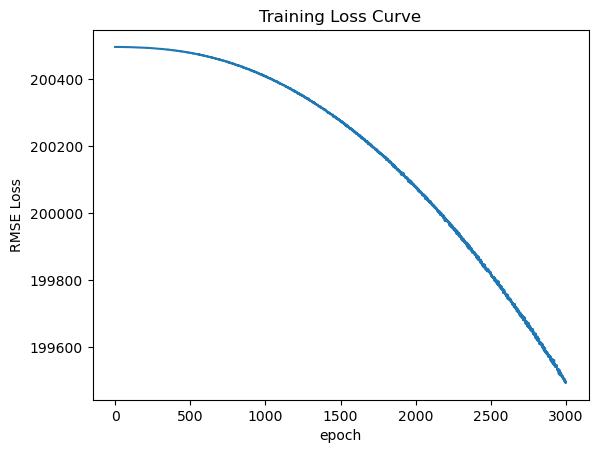

In [33]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), [loss.detach().cpu().numpy() for loss in final_losses])
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')
plt.title('Training Loss Curve')

In [34]:
y_pred=""
with torch.no_grad():
    y_pred=model(test_catg,test_cont)
    loss=torch.sqrt(loss_funcation(y_pred,y_test))
print('RMSE: {}'.format(loss))
    

RMSE: 189959.15625


D:\software\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([180])) that is different to the input size (torch.Size([180, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [35]:
data_verify=pd.DataFrame(y_test.tolist(),columns=['Test'])
data_predicted=pd.DataFrame(y_pred.tolist(),columns=['Prediction'])

In [36]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Diffrence']=final_output['Test']-final_output['Prediction']
final_output.head(5)

,Test,Prediction,Diffrence
0,130000.0,1029.289917,128970.710083
1,138887.0,1164.394287,137722.605713
2,175500.0,1106.706177,174393.293823
3,195000.0,1079.853882,193920.146118
4,142500.0,1017.256897,141482.743103


In [37]:
#saving the model 
torch.save(model,'HousePrice.pt')  ## Saves the entire model (architecture + weights)


In [40]:
torch.save(model.state_dict(),'HouseWeights.pt')   # Saves only the model weights

In [41]:
embs_size=[(15, 8), (5, 3), (4, 2), (5, 3), (10, 5), (8, 4)]
model1 = FeedForwardNN(embs_size, 5, [100, 50], 1, p=0.4)


In [43]:
model1.load_state_dict(torch.load('HouseWeights.pt')) # Loads only the weights into model1

<All keys matched successfully>

In [44]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(4, 2)
    (3): Embedding(5, 3)
    (4): Embedding(10, 5)
    (5): Embedding(8, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=30, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)